In [1]:
#CARGA DE LIBRERIAS
import pandas as pd
import numpy as np 
import os 
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
dir="/home/gaades/ANALITICA_NEGOCIOS/20210301 Analisis Llamadas Facturas"

pf1 = os.path.join(dir,'2. Datos','TBL_FACTRURACION_MOVIL_202112.csv')    

pfR = os.path.join(dir,'3. Resultado','ACLARACION_MC.csv')

In [3]:
MF = pd.read_csv(pf1, sep="|",encoding= "ISO-8859-1")

MF.head()

,CO_ID,MES_EJECUCION,ACLARACION_FACTURA_ACTUAL,ACLARACION_FACTURA_MES_ANTERIOOR,VALOR_FACTURA_ACTUAL,VALOR_FACTURA_MES_ANTERIOR,CFM_ACTUAL,CFM_MES_ANTERIOR,INTENCION_CANCEL_M4,INTENCION_CANCEL_M3,...,COMPRA_TEC_M1,COMPRA_TER_M4,COMPRA_TER_M3,COMPRA_TER_M2,COMPRA_TER_M1,FECHA_ACTIVACION_BSCS,FECHA_NACIMIENTO,DEPARTAMENTO,CANT_MB_INC_PLAN,SUSPENCION_FACTURADA
0,243423534.0,122021,0,0.0,43900.00,43900.00,36632.3463,36632.3463,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2017-10-17,1993-05-11 00:00:00.0,CUNDINAMARCA,20480.0,0.0
1,146911986.0,122021,0,0.0,61940.52,61900.00,51661.5698,51661.5698,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2013-11-30,1968-07-03 00:00:00.0,ANTIOQUIA,30720.0,0.0
2,258358174.0,122021,0,0.0,74992.18,106790.29,35428.6500,35428.6500,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2018-05-27,1995-01-21 00:00:00.0,CUNDINAMARCA,20480.0,0.0
3,365653560.0,122021,0,0.0,NaN,NaN,46653.9862,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2021-12-29,1970-06-08 00:00:00.0,NARIÃO,30720.0,0.0
4,13110327.0,122021,0,0.0,103667.43,103667.59,86081.4959,86081.4959,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2004-12-23,1964-12-12 00:00:00.0,CUNDINAMARCA,99999999.0,0.0


In [4]:
print(MF.shape)

(7330828, 33)


In [5]:
MF.info()
MF.columns.values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7330828 entries, 0 to 7330827
Data columns (total 33 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   CO_ID                             float64
 1   MES_EJECUCION                     int64  
 2   ACLARACION_FACTURA_ACTUAL         int64  
 3   ACLARACION_FACTURA_MES_ANTERIOOR  float64
 4   VALOR_FACTURA_ACTUAL              float64
 5   VALOR_FACTURA_MES_ANTERIOR        float64
 6   CFM_ACTUAL                        float64
 7   CFM_MES_ANTERIOR                  float64
 8   INTENCION_CANCEL_M4               float64
 9   INTENCION_CANCEL_M3               float64
 10  INTENCION_CANCEL_M2               float64
 11  INTENCION_CANCEL_M1               float64
 12  PLAN_ACT_M4                       object 
 13  PLAN_ACT_M3                       object 
 14  PLAN_ACT_M2                       object 
 15  PLAN_ACT_M1                       object 
 16  COMPRA_SERV_ADI_M4                fl

array(['CO_ID', 'MES_EJECUCION', 'ACLARACION_FACTURA_ACTUAL',
       'ACLARACION_FACTURA_MES_ANTERIOOR', 'VALOR_FACTURA_ACTUAL',
       'VALOR_FACTURA_MES_ANTERIOR', 'CFM_ACTUAL', 'CFM_MES_ANTERIOR',
       'INTENCION_CANCEL_M4', 'INTENCION_CANCEL_M3',
       'INTENCION_CANCEL_M2', 'INTENCION_CANCEL_M1', 'PLAN_ACT_M4',
       'PLAN_ACT_M3', 'PLAN_ACT_M2', 'PLAN_ACT_M1', 'COMPRA_SERV_ADI_M4',
       'COMPRA_SERV_ADI_M3', 'COMPRA_SERV_ADI_M2', 'COMPRA_SERV_ADI_M1',
       'COMPRA_TEC_M4', 'COMPRA_TEC_M3', 'COMPRA_TEC_M2', 'COMPRA_TEC_M1',
       'COMPRA_TER_M4', 'COMPRA_TER_M3', 'COMPRA_TER_M2', 'COMPRA_TER_M1',
       'FECHA_ACTIVACION_BSCS', 'FECHA_NACIMIENTO', 'DEPARTAMENTO',
       'CANT_MB_INC_PLAN', 'SUSPENCION_FACTURADA'], dtype=object)

In [6]:
MF['ACLARACION_FACTURA_ACTUAL'] = MF['ACLARACION_FACTURA_ACTUAL'].fillna(0)
MF['ACLARACION_FACTURA_MES_ANTERIOOR'] = MF['ACLARACION_FACTURA_MES_ANTERIOOR'].fillna(0)
MF['VALOR_FACTURA_ACTUAL'] = MF['VALOR_FACTURA_ACTUAL'].fillna(0)
MF['VALOR_FACTURA_MES_ANTERIOR'] = MF['VALOR_FACTURA_MES_ANTERIOR'].fillna(0)
MF['CFM_ACTUAL'] = MF['CFM_ACTUAL'].fillna(0)
MF['CFM_MES_ANTERIOR'] = MF['CFM_MES_ANTERIOR'].fillna(0)

In [7]:
MF['SUSPENCION_FACTURADA'].value_counts()

0.0    7330544
1.0        282
Name: SUSPENCION_FACTURADA, dtype: int64

In [8]:
MF['FECHA_ACTIVACION_BSCS'].value_counts()

2021-12-06    34701
2021-12-02    21577
2021-11-30    18130
2021-12-10    16593
2021-12-01    16541
              ...  
2009-12-25        1
2008-03-21        1
2003-11-17        1
2004-05-02        1
2008-01-01        1
Name: FECHA_ACTIVACION_BSCS, Length: 6729, dtype: int64

In [9]:
MF['FECHA_NACIMIENTO'].value_counts()

1900-01-01 00:00:00.0    111549
1111-11-11 00:00:00.0     13558
1990-01-01 00:00:00.0      7007
1999-01-01 00:00:00.0      6099
1901-02-01 00:00:00.0      5694
                          ...  
2013-03-21 00:00:00.0         1
0168-04-26 00:00:00.0         1
0967-01-27 00:00:00.0         1
0059-11-21 00:00:00.0         1
2012-02-19 00:00:00.0         1
Name: FECHA_NACIMIENTO, Length: 40442, dtype: int64

In [10]:
MF['PLAN_ACT_M2'].isna().sum()

577341

In [11]:
MF['VAR_FAC']=((MF.VALOR_FACTURA_ACTUAL-MF.VALOR_FACTURA_MES_ANTERIOR))

MF['VAR_FAC'].value_counts()

 0.00        2833142
 35899.99      51424
 55900.00      50690
 35900.00      25433
-0.01          25431
              ...   
 1598.98           1
 134.21            1
 2023.99           1
-1291.24           1
 4092.89           1
Name: VAR_FAC, Length: 1238216, dtype: int64

0    4975760
1    2355068
Name: dif_FAC, dtype: int64

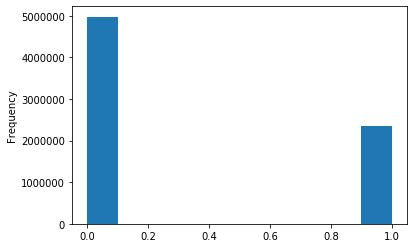

In [12]:
# revisemos los que tienen cambios de aumento de factura 1 vrs los que no

MF['dif_FAC'] = np.where(MF.VAR_FAC>0, 1, 0)
MF['dif_FAC'].plot(kind='hist')
MF['dif_FAC'].value_counts()

In [13]:
# VARIACION CFM
MF['VAR_CFM']=((MF.VALOR_FACTURA_ACTUAL-MF.VALOR_FACTURA_MES_ANTERIOR))
MF['VAR_CFM'].value_counts()

 0.00        2833142
 35899.99      51424
 55900.00      50690
 35900.00      25433
-0.01          25431
              ...   
 1598.98           1
 134.21            1
 2023.99           1
-1291.24           1
 4092.89           1
Name: VAR_CFM, Length: 1238216, dtype: int64

0    4975760
1    2355068
Name: dif_CFM, dtype: int64

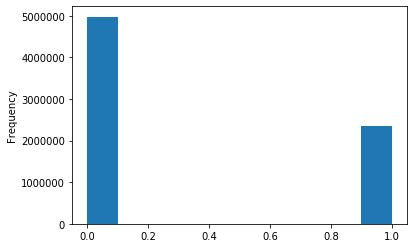

In [14]:
MF['dif_CFM'] = np.where(MF.VAR_CFM>0, 1, 0)
MF['dif_CFM'].plot(kind='hist')
MF['dif_CFM'].value_counts()
                         

In [15]:
#INTENCION CANCELACIÓN
#warnings.filterwarnings("ignore")
MF['INTENCION_CANCEL_M1'] = MF['INTENCION_CANCEL_M1'].fillna(0)
MF['INTENCION_CANCEL_M2'] = MF['INTENCION_CANCEL_M2'].fillna(0)
MF['INTENCION_CANCEL_M3'] = MF['INTENCION_CANCEL_M3'].fillna(0)
MF['INTENCION_CANCEL_M4'] = MF['INTENCION_CANCEL_M4'].fillna(0)

T='INTENSION_CANCEL'

adi=['INTENCION_CANCEL_M1',
'INTENCION_CANCEL_M2',
'INTENCION_CANCEL_M3',
'INTENCION_CANCEL_M4']

for i in adi:
    MF[i]=MF[i].astype(int)


MF[T]= np.where(MF[adi[0]]+MF[adi[1]]+
                               MF[adi[2]]+
                               MF[adi[3]]>0, 1, 0)

MF['INTENSION_CANCEL'].value_counts()


0    6933162
1     397666
Name: INTENSION_CANCEL, dtype: int64

In [16]:
#COMPRA SERV ADICIONAL 
#warnings.filterwarnings("ignore")
MF['COMPRA_SERV_ADI_M1'] = MF['COMPRA_SERV_ADI_M1'].fillna(0)
MF['COMPRA_SERV_ADI_M2'] = MF['COMPRA_SERV_ADI_M2'].fillna(0)
MF['COMPRA_SERV_ADI_M3'] = MF['COMPRA_SERV_ADI_M3'].fillna(0)
MF['COMPRA_SERV_ADI_M4'] = MF['COMPRA_SERV_ADI_M4'].fillna(0)

T='COMPRA_SERV_ADI'

adi=['COMPRA_SERV_ADI_M1',
'COMPRA_SERV_ADI_M2',
'COMPRA_SERV_ADI_M3',
'COMPRA_SERV_ADI_M4']

for i in adi:
    MF[i]=MF[i].astype(int)


MF[T]= np.where(MF[adi[0]]+MF[adi[1]]+
                               MF[adi[2]]+
                               MF[adi[3]]>0, 1, 0)

MF['COMPRA_SERV_ADI'].value_counts()

1    6925503
0     405325
Name: COMPRA_SERV_ADI, dtype: int64

In [17]:
#COMPRA TEC
#warnings.filterwarnings("ignore")
MF['COMPRA_TEC_M1'] = MF['COMPRA_TEC_M1'].fillna(0)
MF['COMPRA_TEC_M2'] = MF['COMPRA_TEC_M2'].fillna(0)
MF['COMPRA_TEC_M3'] = MF['COMPRA_TEC_M3'].fillna(0)
MF['COMPRA_TEC_M4'] = MF['COMPRA_TEC_M4'].fillna(0)

T='COMPRA_TEC'

adi=['COMPRA_TEC_M1',
'COMPRA_TEC_M2',
'COMPRA_TEC_M3',
'COMPRA_TEC_M4']

for i in adi:
    MF[i]=MF[i].astype(int)


MF[T]= np.where(MF[adi[0]]+MF[adi[1]]+
                               MF[adi[2]]+
                               MF[adi[3]]>0, 1, 0)

MF['COMPRA_TEC'].value_counts()

0    7317128
1      13700
Name: COMPRA_TEC, dtype: int64

In [18]:
#COMPRA TER
#warnings.filterwarnings("ignore")
MF['COMPRA_TER_M1'] = MF['COMPRA_TER_M1'].fillna(0)
MF['COMPRA_TER_M2'] = MF['COMPRA_TER_M2'].fillna(0)
MF['COMPRA_TER_M3'] = MF['COMPRA_TER_M3'].fillna(0)
MF['COMPRA_TER_M4'] = MF['COMPRA_TER_M4'].fillna(0)

T='COMPRA_TER'

adi=['COMPRA_TER_M1',
'COMPRA_TER_M2',
'COMPRA_TER_M3',
'COMPRA_TER_M4']

for i in adi:
    MF[i]=MF[i].astype(int)


MF[T]= np.where(MF[adi[0]]+MF[adi[1]]+
                               MF[adi[2]]+
                               MF[adi[3]]>0, 1, 0)

MF['COMPRA_TER'].value_counts()

0    6864788
1     466040
Name: COMPRA_TER, dtype: int64

In [19]:
#CAMBIO PLAN ACTUAL
MF['PLAN_ACT_M1'] = MF['PLAN_ACT_M1'].fillna("0")
MF['PLAN_ACT_M2'] = MF['PLAN_ACT_M2'].fillna("0")
MF['PLAN_ACT_M3'] = MF['PLAN_ACT_M3'].fillna("0")
MF['PLAN_ACT_M4'] = MF['PLAN_ACT_M4'].fillna("0")
MF["PLAN_ACTA"] = np.where((MF["PLAN_ACT_M1"] == MF["PLAN_ACT_M2"]) & (MF["PLAN_ACT_M3"] == MF["PLAN_ACT_M4"] ), 0, 1)


    
    #if ((MF['PLAN_ACT_M4'][i] != MF['PLAN_ACT_M3'][i]) != (MF['PLAN_ACT_M2'][i] !=MF['PLAN_ACT_M1'][i])):
    #    MF['PLAN_ACT'[i]] = 1

    #else: 
    #    MF['PLAN_ACT'[i]] = 0



In [20]:
MF['PLAN_ACTA'].value_counts()

0    6349164
1     981664
Name: PLAN_ACTA, dtype: int64

In [21]:
# REGION
Regiones = ({'PUTUMAYO':'R3. OCCIDENTE',
'HUILA':'R3. OCCIDENTE',
'GUAVIARE':'R4. CENTRO ORIENTE',
'CAQUETA':'R3. OCCIDENTE',
'CAUCA':'R3. OCCIDENTE',
'TOLIMA':'R3. OCCIDENTE',
'NORTE DE SANTANDER':'R2. NORTE',
'NARINO':'R3. OCCIDENTE',
'ARAUCA':'R4. CENTRO ORIENTE',
'CORDOBA':'R1. COSTA',
'META':'R4. CENTRO ORIENTE',
'CALDAS':'R2. NORTE',
'SUCRE':'R1. COSTA',
'RISARALDA':'R2. NORTE',
'SANTANDER':'R2. NORTE',
'MAGDALENA':'R1. COSTA',
'ATLANTICO':'R1. COSTA',
'CESAR':'R1. COSTA',
'QUINDIO':'R2. NORTE',
'ANTIOQUIA':'R2. NORTE',
'CUNDINAMARCA':'R4. CENTRO ORIENTE',
'VALLE DEL CAUCA':'R3. OCCIDENTE',
'BOYACA':'R4. CENTRO ORIENTE',
'CASANARE':'R4. CENTRO ORIENTE',
'CHOCO':'R2. NORTE',
'VAUPES':'R4. CENTRO ORIENTE',
'VICHADA':'R4. CENTRO ORIENTE',
'BOLIVAR':'R1. COSTA',
'LA GUAJIRA':'R1. COSTA',
'AMAZONAS':'R4. CENTRO ORIENTE',
'BOGOTA D.C.':'R4. CENTRO ORIENTE',
'GUAINIA':'R4. CENTRO ORIENTE',
'ARCHIPIELAGO DE SAN ANDRES':'R4. CENTRO ORIENTE'})

MF['REGION']=MF.DEPARTAMENTO.map(Regiones)
 
MF = MF.drop('DEPARTAMENTO', axis=1)
MF=MF.dropna(subset=["REGION"])
MF['REGION'].value_counts()

R4. CENTRO ORIENTE    3298046
R2. NORTE             1558638
R3. OCCIDENTE         1072862
R1. COSTA              924824
Name: REGION, dtype: int64

In [22]:
#EDAD
import time
from datetime import date, datetime

In [23]:

MF['FE'] = pd.to_datetime(MF['FECHA_NACIMIENTO'], errors = 'coerce').dt.strftime('%Y-%m-%d')

In [24]:
#print(MF.loc[0,'FE'])

In [25]:
MF.head()

,CO_ID,MES_EJECUCION,ACLARACION_FACTURA_ACTUAL,ACLARACION_FACTURA_MES_ANTERIOOR,VALOR_FACTURA_ACTUAL,VALOR_FACTURA_MES_ANTERIOR,CFM_ACTUAL,CFM_MES_ANTERIOR,INTENCION_CANCEL_M4,INTENCION_CANCEL_M3,...,dif_FAC,VAR_CFM,dif_CFM,INTENSION_CANCEL,COMPRA_SERV_ADI,COMPRA_TEC,COMPRA_TER,PLAN_ACTA,REGION,FE
0,243423534.0,122021,0,0.0,43900.00,43900.00,36632.3463,36632.3463,1,0,...,0,0.00,0,1,1,0,0,1,R4. CENTRO ORIENTE,1993-05-11
1,146911986.0,122021,0,0.0,61940.52,61900.00,51661.5698,51661.5698,0,0,...,1,40.52,1,0,1,0,0,0,R2. NORTE,1968-07-03
2,258358174.0,122021,0,0.0,74992.18,106790.29,35428.6500,35428.6500,0,0,...,0,-31798.11,0,0,1,0,1,0,R4. CENTRO ORIENTE,1995-01-21
4,13110327.0,122021,0,0.0,103667.43,103667.59,86081.4959,86081.4959,0,0,...,0,-0.16,0,0,1,0,0,0,R4. CENTRO ORIENTE,1964-12-12
5,165305689.0,122021,0,0.0,55900.01,55936.69,46653.9862,46653.9862,0,0,...,0,-36.68,0,0,1,0,0,0,R4. CENTRO ORIENTE,1984-12-01


In [26]:
hoy = date.today()
print(hoy)

2022-01-12


In [27]:
def Calcular_edad(x):
    try:
        nacimiento = datetime.strptime(x, '%Y-%m-%d').date()
        hoy = date.today()
    
        edad = hoy.year - nacimiento.year - ((hoy.month,hoy.day)<(nacimiento.month,nacimiento.day))
    except:
        edad = 0
        
    return edad
    
MF['EDAD'] = MF['FE'].apply(lambda x: Calcular_edad(x))

In [28]:
MF.head()

,CO_ID,MES_EJECUCION,ACLARACION_FACTURA_ACTUAL,ACLARACION_FACTURA_MES_ANTERIOOR,VALOR_FACTURA_ACTUAL,VALOR_FACTURA_MES_ANTERIOR,CFM_ACTUAL,CFM_MES_ANTERIOR,INTENCION_CANCEL_M4,INTENCION_CANCEL_M3,...,VAR_CFM,dif_CFM,INTENSION_CANCEL,COMPRA_SERV_ADI,COMPRA_TEC,COMPRA_TER,PLAN_ACTA,REGION,FE,EDAD
0,243423534.0,122021,0,0.0,43900.00,43900.00,36632.3463,36632.3463,1,0,...,0.00,0,1,1,0,0,1,R4. CENTRO ORIENTE,1993-05-11,28
1,146911986.0,122021,0,0.0,61940.52,61900.00,51661.5698,51661.5698,0,0,...,40.52,1,0,1,0,0,0,R2. NORTE,1968-07-03,53
2,258358174.0,122021,0,0.0,74992.18,106790.29,35428.6500,35428.6500,0,0,...,-31798.11,0,0,1,0,1,0,R4. CENTRO ORIENTE,1995-01-21,26
4,13110327.0,122021,0,0.0,103667.43,103667.59,86081.4959,86081.4959,0,0,...,-0.16,0,0,1,0,0,0,R4. CENTRO ORIENTE,1964-12-12,57
5,165305689.0,122021,0,0.0,55900.01,55936.69,46653.9862,46653.9862,0,0,...,-36.68,0,0,1,0,0,0,R4. CENTRO ORIENTE,1984-12-01,37


In [29]:
'''#Edad

#CALCULAMOS LA FECHA DE HOY

MF["FE"]=pd.to_datetime(MF["FECHA_NACIMIENTO"].apply(lambda x: str(x)), errors = 'coerce')
MF["FE"]=MF["FE"].values.astype('datetime64[D]')

#CALCULAMOS LA FECHA DE HOY
MF['hoy'] = date.today()
MF['hoy']=MF['hoy'].values.astype('datetime64[D]')


MF["EDAD"]=-1

## **********************************************************
## CALCULAMOS LA FECHA EN DONDE PODEMOS
## **********************************************************

for i in range(MF.shape[0]):
    print(i)
    try: 
        MF["EDAD"][i]=(MF['hoy'][i]-MF['FE'][i]) / np.timedelta64(1, 'Y')
    except: 
        MF["EDAD"][i]=np.nan


        #BORRAMOS LA FECHAS QUE TENEMOS PROBLEMAS        
MF = MF.drop('FE', axis=1)
MF = MF.drop('hoy', axis=1)'''

#BORRAMOS LA FECHAS QUE TENEMOS PROBLEMAS  

MF['EDAD']= np.where((MF['EDAD']<0) |(MF['EDAD']>100) ,np.nan,MF['EDAD'] )
bins = [18, 25, 35, 60, 100]
MF['EDAD_CAT'] = pd.cut(MF['EDAD'], bins)
MF['EDAD_CAT'].value_counts()

(35, 60]     3252155
(25, 35]     1698474
(60, 100]     842896
(18, 25]      791236
Name: EDAD_CAT, dtype: int64

In [30]:
#RANGOS MENSUALES
bins = [18000, 25000, 30000, 35000, 40000,45000,50000,60000,80000,350000]

MF['VLR_CFM_CAT'] = pd.cut(MF['CFM_ACTUAL'], bins)
MF['VLR_CFM_CAT'].value_counts()

(35000, 40000]     1110617
(25000, 30000]      984521
(50000, 60000]      956898
(30000, 35000]      880765
(45000, 50000]      824036
(18000, 25000]      785150
(40000, 45000]      656631
(60000, 80000]      355735
(80000, 350000]     135874
Name: VLR_CFM_CAT, dtype: int64

In [31]:
#MF PLAN INIC
MF['CANT_MB_INC_PLAN'] = MF['CANT_MB_INC_PLAN'].fillna(0)
MF['CANT_MB_INC_PLAN'].value_counts()

15360.0    1497942
30720.0    1248267
20480.0    1212496
10240.0     785943
25600.0     539754
            ...   
2458.0           1
4608.0           1
400.0            1
1536.0           1
81920.0          1
Name: CANT_MB_INC_PLAN, Length: 76, dtype: int64

In [32]:
bins = [0,1000,2000,3000,5000,10000,30000,50000,150000,300000,1E10]

MF['CANT_MB_INC_PLAN_CAT'] = pd.cut(MF['CANT_MB_INC_PLAN'], bins)
MF['CANT_MB_INC_PLAN_CAT'].value_counts()

(10000.0, 30000.0]           4287494
(30000.0, 50000.0]           1793374
(50000.0, 150000.0]           516732
(300000.0, 10000000000.0]     158974
(150000.0, 300000.0]           24025
(1000.0, 2000.0]               12520
(3000.0, 5000.0]               12359
(5000.0, 10000.0]               9900
(0.0, 1000.0]                   5972
(2000.0, 3000.0]                  74
Name: CANT_MB_INC_PLAN_CAT, dtype: int64

In [33]:
#ANTIGUEDAD

#CALCULAMOS LA FECHA DE HOY

MF["FA"]=pd.to_datetime(MF["FECHA_ACTIVACION_BSCS"].apply(lambda x: str(x)), errors = 'coerce')
MF["FA"]=MF["FA"].values.astype('datetime64[D]')

#CALCULAMOS LA FECHA DE HOY
MF['hoy'] = date.today()
MF['hoy']=MF['hoy'].values.astype('datetime64[D]')

MF['Antiguedad']= (((MF['hoy']-MF['FA'])/np.timedelta64(1, 'Y')))
MF = MF.drop('FA', axis=1)
MF = MF.drop('hoy', axis=1)
MF['Antiguedad'] = MF['Antiguedad'].fillna(0)

bins = [0, 0.5, 1, 1.5, 2,3,4,5,10,15]
MF['ANTIGUEDAD_CAT'] = pd.cut(MF['Antiguedad'], bins)
MF['ANTIGUEDAD_CAT'].value_counts()

(0.0, 0.5]      1286572
(5.0, 10.0]     1278068
(0.5, 1.0]       834808
(2.0, 3.0]       697004
(1.0, 1.5]       623977
(10.0, 15.0]     554075
(3.0, 4.0]       528450
(1.5, 2.0]       412385
(4.0, 5.0]       370877
Name: ANTIGUEDAD_CAT, dtype: int64

In [34]:
MF.isna().sum()

CO_ID                                    0
MES_EJECUCION                            0
ACLARACION_FACTURA_ACTUAL                0
ACLARACION_FACTURA_MES_ANTERIOOR         0
VALOR_FACTURA_ACTUAL                     0
VALOR_FACTURA_MES_ANTERIOR               0
CFM_ACTUAL                               0
CFM_MES_ANTERIOR                         0
INTENCION_CANCEL_M4                      0
INTENCION_CANCEL_M3                      0
INTENCION_CANCEL_M2                      0
INTENCION_CANCEL_M1                      0
PLAN_ACT_M4                              0
PLAN_ACT_M3                              0
PLAN_ACT_M2                              0
PLAN_ACT_M1                              0
COMPRA_SERV_ADI_M4                       0
COMPRA_SERV_ADI_M3                       0
COMPRA_SERV_ADI_M2                       0
COMPRA_SERV_ADI_M1                       0
COMPRA_TEC_M4                            0
COMPRA_TEC_M3                            0
COMPRA_TEC_M2                            0
COMPRA_TEC_

In [35]:
MF['TOTAL']= 1

COL=['TOTAL','REGION',
     'ANTIGUEDAD_CAT', 'EDAD_CAT',
     'VLR_CFM_CAT','CANT_MB_INC_PLAN_CAT']

FIL=['dif_FAC',
'INTENSION_CANCEL',
'PLAN_ACTA',
'COMPRA_TEC',
'COMPRA_TER',
'SUSPENCION_FACTURADA']



for i in COL:
    MF[i+'_'] = MF[i]
    FIL.append(i+'_')

In [36]:
COL

['TOTAL',
 'REGION',
 'ANTIGUEDAD_CAT',
 'EDAD_CAT',
 'VLR_CFM_CAT',
 'CANT_MB_INC_PLAN_CAT']

In [37]:
FIL

['dif_FAC',
 'INTENSION_CANCEL',
 'PLAN_ACTA',
 'COMPRA_TEC',
 'COMPRA_TER',
 'SUSPENCION_FACTURADA',
 'TOTAL_',
 'REGION_',
 'ANTIGUEDAD_CAT_',
 'EDAD_CAT_',
 'VLR_CFM_CAT_',
 'CANT_MB_INC_PLAN_CAT_']

In [38]:
for i in FIL:
    
    C1=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[0],aggfunc='count',fill_value=0)
    C2=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[1],aggfunc='count',fill_value=0)
    C3=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[2],aggfunc='count',fill_value=0)
    C4=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[3],aggfunc='count',fill_value=0)
    C5=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[4],aggfunc='count',fill_value=0)
    C6=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[5],aggfunc='count',fill_value=0)
    
    
    T1=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[0],aggfunc='mean',fill_value=0)
    T2=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[1],aggfunc='mean',fill_value=0)    
    T3=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[2],aggfunc='mean',fill_value=0)
    T4=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[3],aggfunc='mean',fill_value=0)
    T5=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[4],aggfunc='mean',fill_value=0)
    T6=pd.pivot_table(MF,values='ACLARACION_FACTURA_ACTUAL',index=[i],columns=COL[5],aggfunc='mean',fill_value=0)

    
    
    final=pd.concat([C1,T1*100,T2*100,T3*100,T4*100,T5*100,T6*100, C2,C3,C4,C5,C6],axis=1)
    final['var']=i
    
    if i=='dif_FAC': 
        result = final
    else:   
        frames = [result,final]
        result = pd.concat(frames)




In [39]:
result

,1,1,R1. COSTA,R2. NORTE,R3. OCCIDENTE,R4. CENTRO ORIENTE,"(0.0, 0.5]","(0.5, 1.0]","(1.0, 1.5]","(1.5, 2.0]",...,"(1000.0, 2000.0]","(2000.0, 3000.0]","(3000.0, 5000.0]","(5000.0, 10000.0]","(10000.0, 30000.0]","(30000.0, 50000.0]","(50000.0, 150000.0]","(150000.0, 300000.0]","(300000.0, 10000000000.0]",var
0.0,4647887,1.177890,1.404195,1.051678,1.211994,1.167169,1.585340,1.352090,1.240744,1.221937,...,10345,57,8838,8094,2920433,1193119,350460,16863,106496,dif_FAC
1.0,2206483,1.469941,1.651148,1.301102,1.493542,1.483881,1.975143,1.514937,1.491220,1.487818,...,2175,17,3521,1806,1367061,600255,166272,7162,52478,dif_FAC
0.0,6483275,1.227404,1.442479,1.082273,1.255552,1.227221,1.682122,1.338332,1.257407,1.262195,...,12065,70,11277,9478,4022269,1709042,502151,23676,154510,INTENSION_CANCEL
1.0,371095,2.049340,2.266667,2.021426,2.081909,1.980363,2.592048,2.271989,2.304725,2.053895,...,455,4,1082,422,265225,84332,14581,349,4464,INTENSION_CANCEL
0.0,5937382,1.177051,1.373477,1.039150,1.214335,1.176622,1.539692,1.340299,1.277356,1.262366,...,11366,69,11131,8908,3719423,1505151,475620,23769,144222,PLAN_ACTA
1.0,916988,1.886066,2.136874,1.730627,1.871519,1.880739,2.037575,2.063753,1.877004,1.929878,...,1154,5,1228,992,568071,288223,41112,256,14752,PLAN_ACTA
0.0,6841486,1.267108,1.488320,1.126156,1.298764,1.261409,1.728664,1.406811,1.315589,1.299678,...,12513,74,12346,9892,4279913,1789911,515368,23999,158558,COMPRA_TEC
1.0,12884,3.818690,4.253835,4.255319,3.687636,3.659331,6.896552,4.819277,4.467354,4.227213,...,7,0,13,8,7581,3463,1364,26,416,COMPRA_TEC
0.0,6420960,1.138599,1.331547,1.009237,1.161351,1.138930,1.668522,1.229904,1.157889,1.142768,...,12318,71,11865,9571,4005650,1685381,484234,23311,150026,COMPRA_TER
1.0,433410,3.246810,3.850251,3.248947,3.188847,3.100401,4.538388,3.795471,3.423761,3.490070,...,202,3,494,329,281844,107993,32498,714,8948,COMPRA_TER


In [40]:
pfR = os.path.join(dir,'3. Resultado','ANALISIS_MOVIL_202112.csv')  
export_csv =result.to_csv (pfR,sep =';') 
result

,1,1,R1. COSTA,R2. NORTE,R3. OCCIDENTE,R4. CENTRO ORIENTE,"(0.0, 0.5]","(0.5, 1.0]","(1.0, 1.5]","(1.5, 2.0]",...,"(1000.0, 2000.0]","(2000.0, 3000.0]","(3000.0, 5000.0]","(5000.0, 10000.0]","(10000.0, 30000.0]","(30000.0, 50000.0]","(50000.0, 150000.0]","(150000.0, 300000.0]","(300000.0, 10000000000.0]",var
0.0,4647887,1.177890,1.404195,1.051678,1.211994,1.167169,1.585340,1.352090,1.240744,1.221937,...,10345,57,8838,8094,2920433,1193119,350460,16863,106496,dif_FAC
1.0,2206483,1.469941,1.651148,1.301102,1.493542,1.483881,1.975143,1.514937,1.491220,1.487818,...,2175,17,3521,1806,1367061,600255,166272,7162,52478,dif_FAC
0.0,6483275,1.227404,1.442479,1.082273,1.255552,1.227221,1.682122,1.338332,1.257407,1.262195,...,12065,70,11277,9478,4022269,1709042,502151,23676,154510,INTENSION_CANCEL
1.0,371095,2.049340,2.266667,2.021426,2.081909,1.980363,2.592048,2.271989,2.304725,2.053895,...,455,4,1082,422,265225,84332,14581,349,4464,INTENSION_CANCEL
0.0,5937382,1.177051,1.373477,1.039150,1.214335,1.176622,1.539692,1.340299,1.277356,1.262366,...,11366,69,11131,8908,3719423,1505151,475620,23769,144222,PLAN_ACTA
1.0,916988,1.886066,2.136874,1.730627,1.871519,1.880739,2.037575,2.063753,1.877004,1.929878,...,1154,5,1228,992,568071,288223,41112,256,14752,PLAN_ACTA
0.0,6841486,1.267108,1.488320,1.126156,1.298764,1.261409,1.728664,1.406811,1.315589,1.299678,...,12513,74,12346,9892,4279913,1789911,515368,23999,158558,COMPRA_TEC
1.0,12884,3.818690,4.253835,4.255319,3.687636,3.659331,6.896552,4.819277,4.467354,4.227213,...,7,0,13,8,7581,3463,1364,26,416,COMPRA_TEC
0.0,6420960,1.138599,1.331547,1.009237,1.161351,1.138930,1.668522,1.229904,1.157889,1.142768,...,12318,71,11865,9571,4005650,1685381,484234,23311,150026,COMPRA_TER
1.0,433410,3.246810,3.850251,3.248947,3.188847,3.100401,4.538388,3.795471,3.423761,3.490070,...,202,3,494,329,281844,107993,32498,714,8948,COMPRA_TER
